In [1]:
%matplotlib inline

# Hashed Resolution

In [2]:
import json
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['svg.fonttype'] = 'none'

In [14]:
RAW_HASHED_DATA_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/raw/hashed_resolution")

In [15]:
RAW_ATTENUATED_DATA_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/raw/forward_deferred")

In [26]:
RAW_TILED_DATA_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/raw/tiled")

In [4]:
RESOLUTIONS = [ 320
              , 640
              , 960
              , 1280
              , 1920
              , 2560
              ]

SCENES = ["pipers-alley", "ziggurat-city", "spaceship-indoor"]

PIPELINE_TYPES = ["forward",]

N_TESTS = 3

In [5]:
def json_to_dataframe(json_dic : dict) -> pd.DataFrame:
    '''
    Convert a json data file spit out by nTiled into something just slightly more useful
    '''
    # get all functions tracked from first frame
    frames = json_dic["frames"]
    functions = list(x for x in frames[0]["functions"])
    
    # build empty dictionary which will be loaded with data from frames
    data_raw = { fn : {} for fn in functions }    
    frames_i = {}
    
    for f in frames:
        f_i = int(f["frame"])
        frames_i[f_i] = f_i
        for fn in functions:
            if fn in f["functions"]:
                data_raw[fn][f_i] = float(f["functions"][fn])
            
    data_series = {fn : pd.Series(data_raw[fn], name=fn) for fn in functions }
    data_series["index"] = pd.Series(frames_i, name="index")
    
    dataframe = pd.DataFrame(data_series)
    return dataframe

In [10]:
def extract_frames_data_frame_hashed(scene, resolution):
    folder_path = RAW_HASHED_DATA_ROOT / Path("forward/{}/{}/".format(scene, resolution))
    
    dfs = []
    
    for i in range(N_TESTS):
        file_path = folder_path / Path("data_{}.json".format(i))
        with open(str(file_path), 'r') as f:
            data_json = json.loads(f.read())
        
        dfs.append(json_to_dataframe(data_json))
        
    # average execution times
    frame_mean = pd.concat(dfs)
    by_row_index = frame_mean.groupby(frame_mean.index)
    df_means = by_row_index.mean()
    
    df_means = df_means.drop(df_means.index[-1])
    
    return df_means

In [34]:
scene_lights = { "pipers-alley" : "1044#3x_3y_2z"
               , "ziggurat-city" : "1170#3x_3y_2z"
               , "spaceship-indoor" : "1260#3x_3y_2z"
               }

In [35]:
def extract_frames_data_frame_attenuated(scene, resolution):
    folder_path = RAW_ATTENUATED_DATA_ROOT / Path("forward/{}/{}/{}/".format(scene, scene_lights[scene], resolution))
    
    dfs = []
    
    for i in range(N_TESTS):
        file_path = folder_path / Path("data_{}.json".format(i))
        with open(str(file_path), 'r') as f:
            data_json = json.loads(f.read())
        
        dfs.append(json_to_dataframe(data_json))
        
    # average execution times
    frame_mean = pd.concat(dfs)
    by_row_index = frame_mean.groupby(frame_mean.index)
    df_means = by_row_index.mean()
    
    df_means = df_means.drop(df_means.index[-1])
    
    return df_means

In [36]:
def extract_frames_data_frame_tiled(scene, resolution):
    folder_path = RAW_TILED_DATA_ROOT / Path("forward/{}/{}/{}/32/".format(scene, scene_lights[scene], resolution))
    
    dfs = []
    
    for i in range(N_TESTS):
        file_path = folder_path / Path("data_{}.json".format(i))
        with open(str(file_path), 'r') as f:
            data_json = json.loads(f.read())
        
        dfs.append(json_to_dataframe(data_json))
        
    # average execution times
    frame_mean = pd.concat(dfs)
    by_row_index = frame_mean.groupby(frame_mean.index)
    df_means = by_row_index.mean()
    
    df_means = df_means.drop(df_means.index[-1])
    
    return df_means

In [20]:
pipers_alley_frame_2560 = extract_frames_data_frame_hashed("pipers-alley", 2560)

In [21]:
pipers_alley_frame_2560_att = extract_frames_data_frame_attenuated("pipers-alley", 2560)

In [18]:
pipers_alley_frame_2560_att

,ForwardAttenuatedShader::renderObjects,index
3,644.180938,3
4,645.189399,4
5,654.146634,5
6,655.744790,6
7,654.512066,7
8,662.090403,8
9,663.912165,9
10,668.381366,10
11,672.226634,11
12,673.954765,12


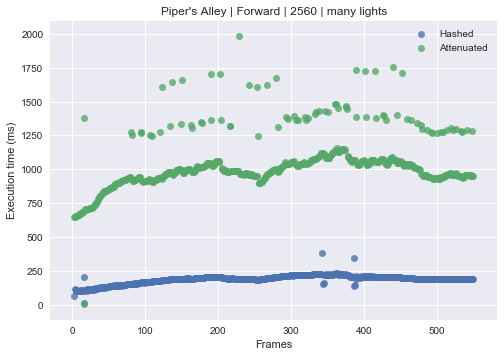

In [19]:
ax = sns.regplot("index", "ForwardHashedShader::renderObjects", data=pipers_alley_frame_2560, fit_reg=False, label="Hashed")
ax = sns.regplot("index", "ForwardAttenuatedShader::renderObjects", data=pipers_alley_frame_2560_att, fit_reg=False, label="Attenuated")

ax.set(xlabel='Frames', ylabel='Execution time (ms)')
ax.legend()

ax.set_title("Piper's Alley | Forward | 2560 | many lights")
plt.show()

In [27]:
pipers_alley_frame_1920_hashed = extract_frames_data_frame_hashed("pipers-alley", 1920)
pipers_alley_frame_1920_attenu = extract_frames_data_frame_attenuated("pipers-alley", 1920)
pipers_alley_frame_1920_tiled = extract_frames_data_frame_tiled("pipers-alley", 1920)

In [31]:
col_list = list(x for x in pipers_alley_frame_1920_tiled if (x != 'index'))
pipers_alley_frame_1920_tiled.loc[:, 'total'] = pipers_alley_frame_1920_tiled[col_list].sum(axis=1)

pipers_alley_frame_1920_tiled

,ForwardTiledShader::loadLightGrid,ForwardTiledShader::renderObjects,TiledLightManager::buildGrid,TiledLightManager::clearGrid,TiledLightManager::finaliseGrid,index,total
3,465.655309,0.244016,11.709761,1.016889,7.459424,3,972.170798
4,1.716280,0.195160,9.861136,1.155292,7.261235,4,40.378206
5,1.661498,0.220576,9.985975,1.082864,6.463473,5,38.828774
6,126.380115,0.241778,12.746535,1.217580,6.990749,6,295.153514
7,152.421004,0.275885,11.428477,1.095243,6.867358,7,344.175934
8,153.144626,0.271671,10.595160,1.301333,6.555786,8,343.737152
9,157.272362,0.254947,12.225185,1.085235,6.713811,9,355.103078
10,152.360165,0.276412,11.457317,1.056527,6.496132,10,343.293103
11,159.101893,0.273119,10.573169,1.055473,6.758321,11,355.523951
12,155.864230,0.265877,13.227720,1.187951,6.767671,12,354.626897


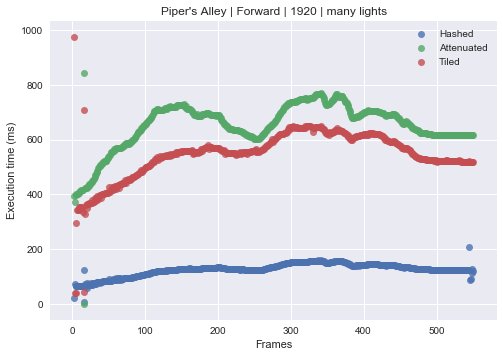

In [32]:
ax = sns.regplot("index", "ForwardHashedShader::renderObjects", data=pipers_alley_frame_1920_hashed, fit_reg=False, label="Hashed")
ax = sns.regplot("index", "ForwardAttenuatedShader::renderObjects", data=pipers_alley_frame_1920_attenu, fit_reg=False, label="Attenuated")
ax = sns.regplot("index", "total", data=pipers_alley_frame_1920_tiled, fit_reg=False, label="Tiled")

ax.set(xlabel='Frames', ylabel='Execution time (ms)')
ax.legend()

ax.set_title("Piper's Alley | Forward | 1920 | many lights")
plt.show()

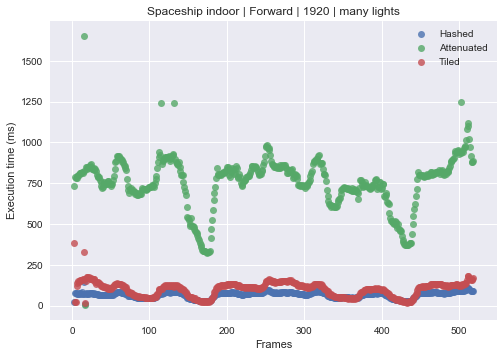

In [39]:
si_frame_1920_hashed = extract_frames_data_frame_hashed("spaceship-indoor", 1920)
si_frame_1920_attenu = extract_frames_data_frame_attenuated("spaceship-indoor", 1920)
si_frame_1920_tiled = extract_frames_data_frame_tiled("spaceship-indoor", 1920)

col_list = list(x for x in si_frame_1920_tiled if (x != 'index'))
si_frame_1920_tiled.loc[:, 'total'] = si_frame_1920_tiled[col_list].sum(axis=1)

ax = sns.regplot("index", "ForwardHashedShader::renderObjects", data=si_frame_1920_hashed, fit_reg=False, label="Hashed")
ax = sns.regplot("index", "ForwardAttenuatedShader::renderObjects", data=si_frame_1920_attenu, fit_reg=False, label="Attenuated")
ax = sns.regplot("index", "total", si_frame_1920_tiled, fit_reg=False, label="Tiled")

ax.set(xlabel='Frames', ylabel='Execution time (ms)')
ax.legend()

ax.set_title("Spaceship indoor | Forward | 1920 | many lights")
plt.show()

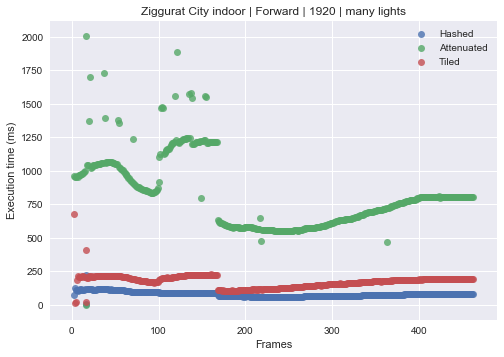

In [41]:
zc_frame_1920_hashed = extract_frames_data_frame_hashed("ziggurat-city", 1920)
zc_frame_1920_attenu = extract_frames_data_frame_attenuated("ziggurat-city", 1920)
zc_frame_1920_tiled = extract_frames_data_frame_tiled("ziggurat-city", 1920)

col_list = list(x for x in zc_frame_1920_tiled if (x != 'index'))
zc_frame_1920_tiled.loc[:, 'total'] = zc_frame_1920_tiled[col_list].sum(axis=1)

ax = sns.regplot("index", "ForwardHashedShader::renderObjects", data=zc_frame_1920_hashed, fit_reg=False, label="Hashed")
ax = sns.regplot("index", "ForwardAttenuatedShader::renderObjects", data=zc_frame_1920_attenu, fit_reg=False, label="Attenuated")
ax = sns.regplot("index", "total", zc_frame_1920_tiled, fit_reg=False, label="Tiled")

ax.set(xlabel='Frames', ylabel='Execution time (ms)')
ax.legend()

ax.set_title("Ziggurat City indoor | Forward | 1920 | many lights")
plt.show()

In [49]:
def extract_resolution_data_frame_hashed(scene):
    folder_path = RAW_HASHED_DATA_ROOT / Path("forward/{}/".format(scene))
    
    output = pd.DataFrame([], columns=["execution_time", "resolution"])
    
    index = 0
    
    for res in RESOLUTIONS:
        res_path = folder_path / Path("{}".format(res))
        
        for i in range(N_TESTS):
            file_path = res_path / Path("data_{}.json".format(i))
            
            with open(str(file_path), 'r') as f:
                data_json = json.loads(f.read())
            df = json_to_dataframe(data_json)
            output.loc[index] = [df.mean(axis=0).iloc[0], res]
            index += 1
    return output

In [54]:
def extract_resolution_data_frame_attenuated(scene):
    folder_path = RAW_ATTENUATED_DATA_ROOT / Path("forward/{}/{}/".format(scene, scene_lights[scene]))
    
    output = pd.DataFrame([], columns=["execution_time", "resolution"])
    
    index = 0
    
    for res in RESOLUTIONS:
        res_path = folder_path / Path("{}".format(res))
        
        for i in range(N_TESTS):
            file_path = res_path / Path("data_{}.json".format(i))
            
            with open(str(file_path), 'r') as f:
                data_json = json.loads(f.read())
            df = json_to_dataframe(data_json)
            output.loc[index] = [df.mean(axis=0).iloc[0], res]
            index += 1
    return output

In [59]:
def extract_resolution_data_frame_tiled(scene):
    folder_path = RAW_TILED_DATA_ROOT / Path("forward/{}/{}/".format(scene, scene_lights[scene]))
    
    output = pd.DataFrame([], columns=["execution_time", "resolution"])
    
    index = 0
    
    potatoes = [ 640
               , 960
               , 1280
               , 1920
               ]
    for res in potatoes:
        res_path = folder_path / Path("{}/32/".format(res))
        
        for i in range(N_TESTS):
            file_path = res_path / Path("data_{}.json".format(i))
            
            with open(str(file_path), 'r') as f:
                data_json = json.loads(f.read())
            df = json_to_dataframe(data_json)
            output.loc[index] = [df.mean(axis=0).iloc[0], res]
            index += 1
    return output

In [50]:
si_res_data_hashed = extract_resolution_data_frame_hashed("spaceship-indoor")
si_res_data_hashed

,execution_time,resolution
0,16.570679,320.0
1,16.540645,320.0
2,16.544278,320.0
3,16.580205,640.0
4,16.610270,640.0
5,16.602772,640.0
6,22.811024,960.0
7,22.735836,960.0
8,22.874027,960.0
9,33.740747,1280.0


In [55]:
si_res_data_attenuated = extract_resolution_data_frame_attenuated("spaceship-indoor")

In [60]:
si_res_data_tiled = extract_resolution_data_frame_tiled("spaceship-indoor")

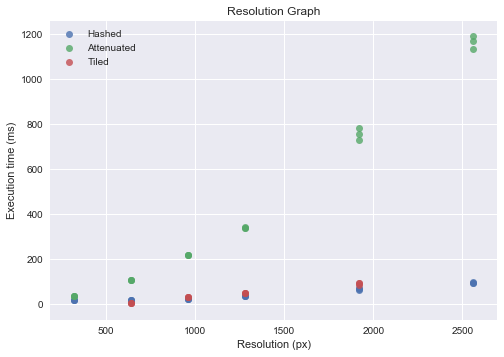

In [62]:
ax = sns.regplot("resolution", "execution_time", 
                 data=si_res_data_hashed, fit_reg=False, 
                 label="Hashed")
ax = sns.regplot("resolution", "execution_time", 
                 data=si_res_data_attenuated, fit_reg=False, 
                 label="Attenuated")
ax = sns.regplot("resolution", "execution_time", 
                 data=si_res_data_tiled, fit_reg=False, 
                 label="Tiled")

    
ax.set(xlabel='Resolution (px)', ylabel='Execution time (ms)')
ax.legend()         
ax.set_title("Resolution Graph")
    
plt.show()

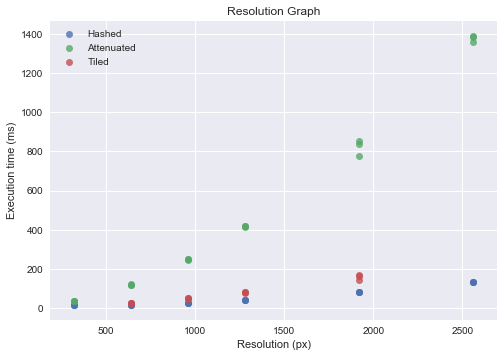

In [63]:
zc_res_data_hashed = extract_resolution_data_frame_hashed("ziggurat-city")
zc_res_data_attenuated = extract_resolution_data_frame_attenuated("ziggurat-city")
zc_res_data_tiled = extract_resolution_data_frame_tiled("ziggurat-city")

ax = sns.regplot("resolution", "execution_time", 
                 data=zc_res_data_hashed, fit_reg=False, 
                 label="Hashed")
ax = sns.regplot("resolution", "execution_time", 
                 data=zc_res_data_attenuated, fit_reg=False, 
                 label="Attenuated")
ax = sns.regplot("resolution", "execution_time", 
                 data=zc_res_data_tiled, fit_reg=False, 
                 label="Tiled")

    
ax.set(xlabel='Resolution (px)', ylabel='Execution time (ms)')
ax.legend()         
ax.set_title("Resolution Graph")
    
plt.show()

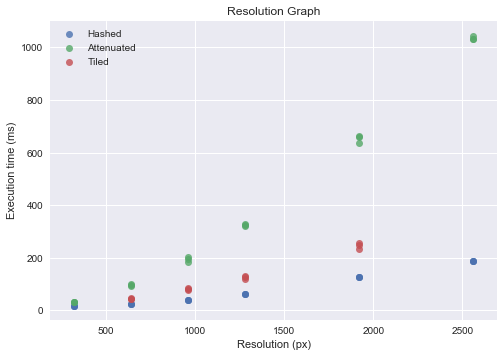

In [64]:
pa_res_data_hashed = extract_resolution_data_frame_hashed("pipers-alley")
pa_res_data_attenuated = extract_resolution_data_frame_attenuated("pipers-alley")
pa_res_data_tiled = extract_resolution_data_frame_tiled("pipers-alley")

ax = sns.regplot("resolution", "execution_time", 
                 data=pa_res_data_hashed, fit_reg=False, 
                 label="Hashed")
ax = sns.regplot("resolution", "execution_time", 
                 data=pa_res_data_attenuated, fit_reg=False, 
                 label="Attenuated")
ax = sns.regplot("resolution", "execution_time", 
                 data=pa_res_data_tiled, fit_reg=False, 
                 label="Tiled")

    
ax.set(xlabel='Resolution (px)', ylabel='Execution time (ms)')
ax.legend()         
ax.set_title("Resolution Graph")
    
plt.show()